Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = ""
COLLABORATORS = ""

---

# Vaja 2: Sivinske preslikave slik
## Navodila
Sivinske preslikave so poljubne preslikave $\mathcal{T}: \mathbb{R} \rightarrow \mathbb{R}$ dinamičnega območja $[0,L_r-1]$ referenčne slike $r(x,y)$ v dinamično območje $[0, L_s-1]$ preslikane slike $s(x,y)$. Preslikavo izvedemo na vseh slikovnih elementih referenčne slike kot $s(x, y) = \mathcal{T}( r(x,y) )$. Glavni namen sivinskih preslikav je **povečanje kontrasta** struktur zanimanja, uporabljajo pa se tudi za **prilagoditev dinamičnega območja** referenčne slike za potrebe prikazovanja. Pri vaji boste spoznali linearno preslikavo, oknjenje, upragovljanje in nelinearno gama preslikavo.

![](./images/RV_3_SLO_Transformacije.png)

Barvo slikovnega elementa običajno definiramo s tremi, včasih pa celo z dvema komponentama oz. vrednostima. Zaradi načina pretvorbe svetlobe v digitalni zapis se najpogosteje uporablja zapis barve s komponentami $RGB$, ki ustrezajo trem različnim detektorjem svetlobe in ki so selektivno občutljivi pri valovnih dolžinah svetlobe okoli 700 nm ($R$), 550 nm ($G$) in 450 nm ($B$). Obstajajo tudi drugi barvni prostori, ki so bolj primerni za analizo digitalnih slik, naprimer $HSV$ in $L^*a^*b^*$. Sliko v RGB barvnem prostoru lahko pretvorimo v drug barvni prostor z (ne)linearno preslikavo $RGB$ komponent.

![](./images/RV_3_Pretvorba_RGB_HSV.png)


## Naloge
Pri vaji boste napisali funkcije sivinskih preslikav in funkcije za pretvorbo $RGB$ slik v $HSV$ barvni prostor ter preizkusili delovanje teh funkcij na sivinski in barvni sliki. 

1. Naložite barvno $RGB$ sliko `./data/slika.jpg` v okolje Python z ukazom `open()` v knjižnici `PIL.Image` in jo pretvorite v 8-bitno sivinsko sliko kot $S=0,299R+0,587G+0,114B$. Poskrbite za ustrezno zaokroževanje in pretvorbo tipa sivinskih vrednosti slikovnih elementov. 

In [2]:
#v rgb je treba vse spreminjat, hsv(huse sta. value) pa samo value.
import numpy as np
import matplotlib.pyplot as plt
import rvlib
import PIL.Image as Image

In [3]:
def convertToGray(image):
    dtype = image.dtype
    rgb = np.array(image, dtype='float')
    gray = rgb[:, :, 0] * 0.299 + rgb[:, :, 1] * 0.587 + rgb[:, :, 2] * 0.114
    
    return gray.astype(dtype)

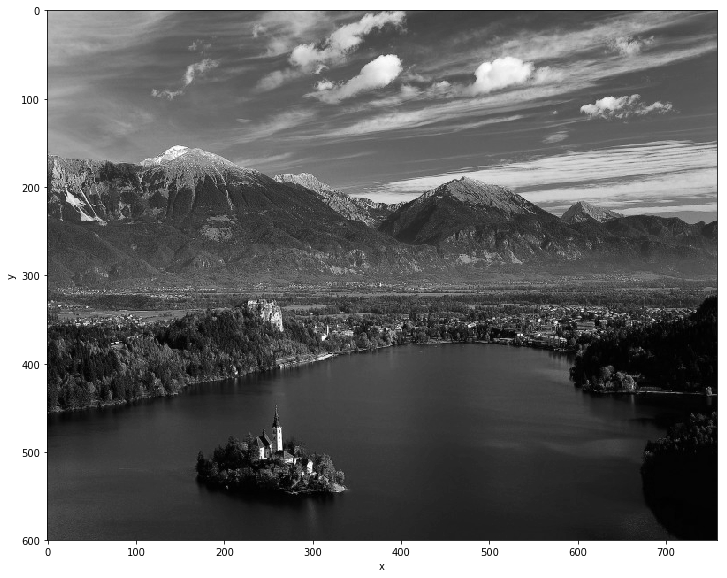

In [4]:
slika = np.array(Image.open("./data/slika.jpg"))
#slika = loadImageRaw("./data/slika.jpg", )
slika = convertToGray(slika)
#plt.imshow(slika)
plt.figure(figsize = (12,12))
rvlib.showImage(slika)

2. Napišite funkcijo za poljubno linearno sivinsko preslikavo sivinske slike `iImage`:
    ```python
	def scaleImage( iImage, iSlopeA, iIntersectionB ):
        return oImage
    ```
    kjer sta `iSlopeA` in `iIntersectionB` parametra $a$ in $b$ linearne preslikave. Funkcija vrne linearno preslikano sivinsko sliko `oImage`, ki naj bo enakega tipa kot vhodna slika. Minimalne in maksimalne vrednosti celoštevilskih podatkovnih tipov dobite z `numpy.iinfo(dtype).min` in `numpy.iinfo(dtype).max`. Preverite delovanje funkcije na sivinski sliki s poljubno linearno sivinsko preslikavo.

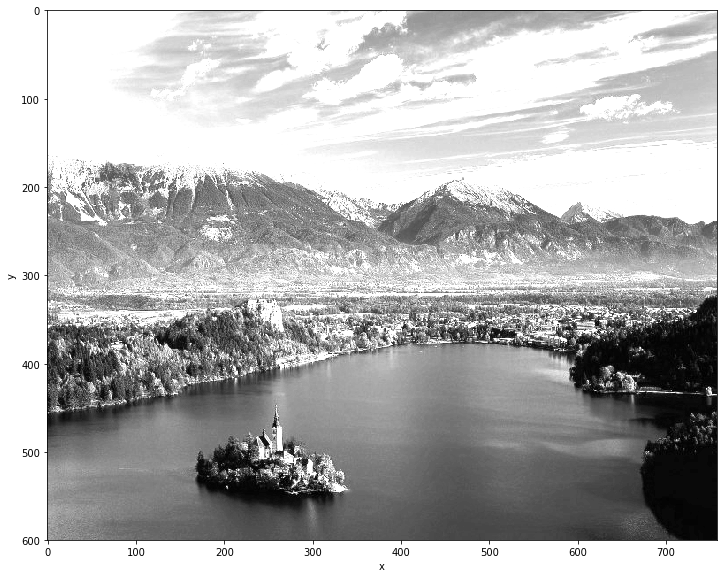

In [5]:
def scaleImage(iImage, iSlopeA, iIntersectionB):
    iImageType = iImage.dtype
    iImage = iImage.astype('float')
    #iImage = np.array(iImage, dtype = 'float')
    oImage = iSlopeA * iImage + iIntersectionB
    if iImageType.kind in ('u', 'i'):
        #oImage[oImage < np.iinfo(iImageType).min] = np.iinfo(iImageType).min
        max_val = np.iinfo(iImageType).max
        min_val = np.iinfo(iImageType).min
        oImage[oImage < min_val] = min_val
        oImage[oImage > max_val] = max_val
    return oImage.astype(iImageType)

slika_scaled = scaleImage(slika, 2, 32)
#plt.imshow(slika)
plt.figure(figsize = (12,12))
rvlib.showImage(slika_scaled)

3. Napišite funkcijo za poljubno linearno sivinsko oknjenje sivinske slike `iImage`:
    ```python
    def windowImage( iImage, iCenter, iWidth ):
        return oImage
    ```
	kjer sta `iCenter` in `iWidth` parametra $c$ in $w$ linearnega oknjenja. Funkcija naj vrne linearno sivinsko oknjeno sliko `oImage`, ki naj bo enakega tipa kot vhodna slika. Minimalne in maksimalne vrednosti celoštevilskih podatkovnih tipov dobite z `numpy.iinfo( dtype ).min` in `numpy.iinfo( dtype ).max`. Preverite delovanje funkcije na sivinski sliki s poljubnim sivinskim oknjenjem.

[196 198 202 203 202 201 201 200 200 198 197 197 197 198 198 198 196 195
 192 191 191 193 195 195 190 190 190 190 190 190 191 192 190 188 188 188
 188 187 187 188 188 185 183 183 185 186 185 183 183 185 185 185 181 181
 180 177 177 177 177 176 175 172 173 176 178 177 176 176 177 176 173 167
 171 172 171 170 168 168 167 167 167 167 166 165 166 165 162 161 162 160
 157 157 156 155 153 155 155 152 153 156 155 155 157 160 158 163 162 158
 157 161 165 167 167 165 167 168 171 172 177 183 183 183 181 178 181 183
 183 182 187 186 187 185 183 181 181 180 178 176 170 165 158 153 148 146
 140 136 131 126 123 122 121 122 122 120 115 112 110 108 107 106 103 102
 102 102 103 105 105 103 101 101  98  97  96  95  92  92  88  90  90  90
  88  87  85  85  86  86  87  88  88  88  87  86  87  87  87  88  88  87
  87  86  86  86  87  91  90  87  87  90  86  86  85  85  85  85  85  85
  87  86  83  83  83  85  86  86  86  88  93  93  92  91  91  91  85  85
  87  88  88  88  87  85  88  86  86  90  92  91  9

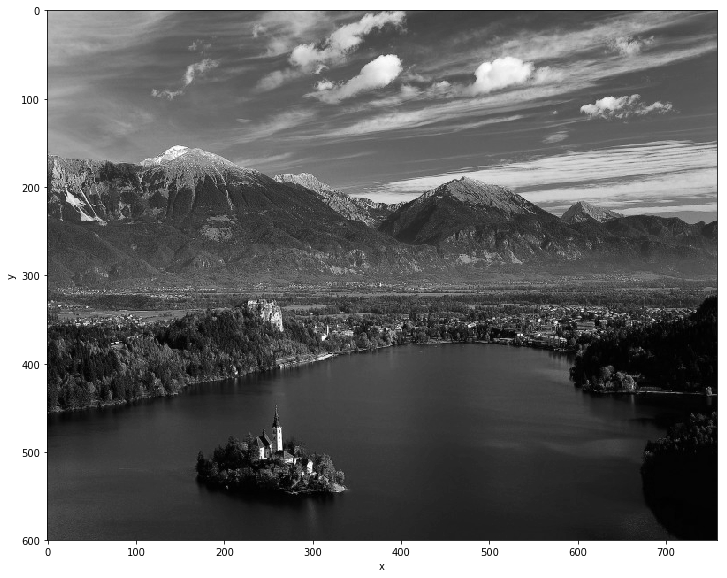

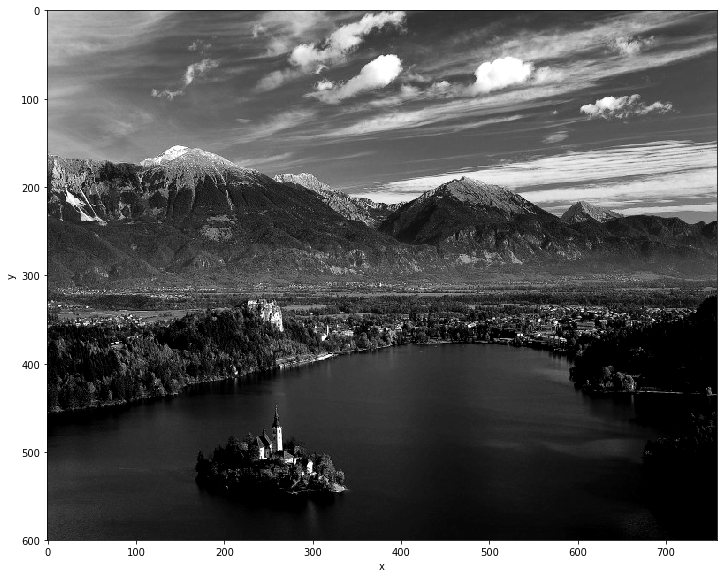

In [6]:
def windowImage(iImage, iCenter, iWidth):
    iImageType = iImage.dtype
    if iImageType.kind in ('u', 'v'):
        iMaxValue = np.iinfo(iImageType).max
        iMinValue = np.iinfo(iImageType).min
        iRange = iMaxValue - iMinValue
    else:#ce niso cela stevila
        iMaxValue = np.max(iImage)
        iMinValue = np.min(iImage)
        iRange = iMaxValue - iMinValue
    
    iSlopeA = iRange / float(iWidth)
    iInterceptB = -iSlopeA * (float(iCenter) - iWidth/2.0)
    
    return scaleImage(iImage, iSlopeA, iInterceptB)

slika_window = windowImage(slika, 127, 204)
plt.figure(figsize = (12,12))
rvlib.showImage(slika)
plt.figure(figsize = (12,12))#dodaj v knjiznico
rvlib.showImage(slika_window)
print(slika_window[0, :])

4. Napišite funkcijo za poljubno sivinsko upragovljanje sivinske slike `iImage`:
    ```python
    def thresholdImage( iImage, iThreshold ):
        return oImage
    ```
    kjer je `iThreshold` parameter upragovljanja oz. prag $t$. Funkcija vrne upragovljeno sliko `oImage`. Preverite delovanje funkcije na sivinski sliki s poljubnim pragom $t$.

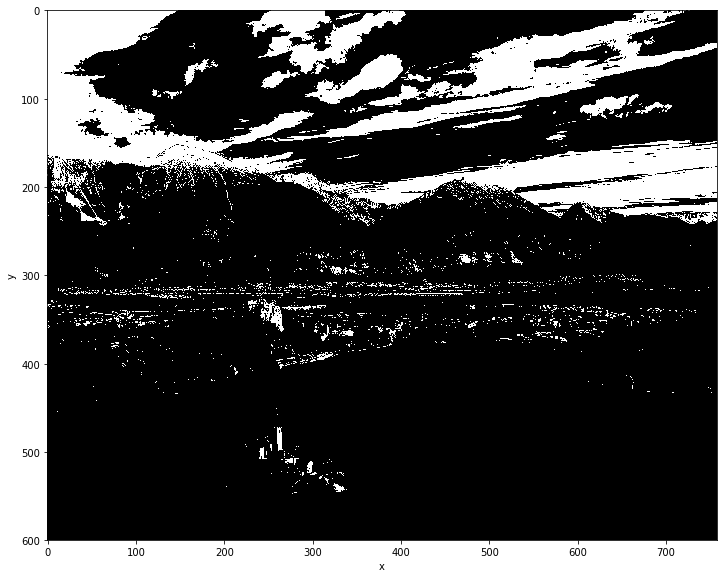

In [7]:
def thresholdImage(iImage, iThreshold):
    oImage = 255 * np.array(iImage > iThreshold, dtype='uint8')
    return oImage

slika_thres = thresholdImage(slika, 127)
plt.figure(figsize = (12,12))
rvlib.showImage(slika_thres)


5. Napišite funkcijo za poljubno gama sivinsko preslikavo sivinske slike `iImage`:
    ```python
    def gammaImage( iImage, iGamma ):
        return oImage
    ```
    kjer je `iGamma` parameter $\gamma$. Funkcija naj vrne gama sivinsko preslikano sliko `oImage`, ki naj bo enakega tipa kot vhodna slika. Preverite delovanje funkcije na sivinski sliki z $\gamma>1$ in $\gamma<1$ in analizirajte vpliv na histogram slike.

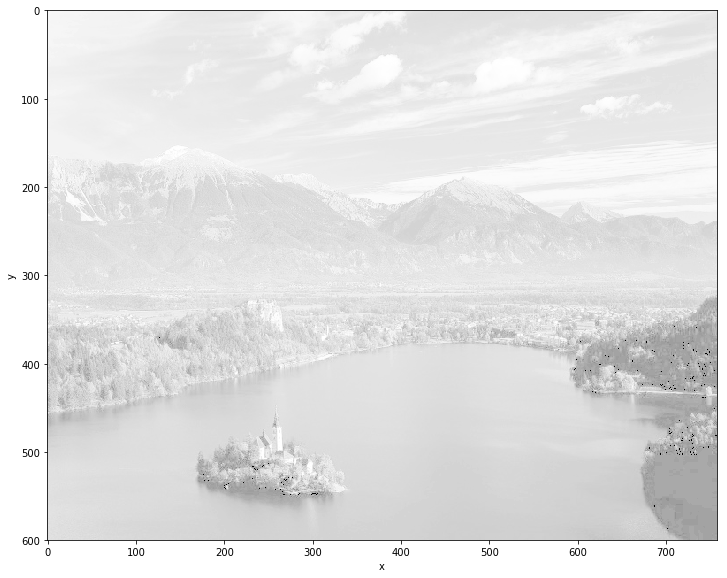

In [8]:
def gammaImage(iImage, iGamma):
    iImageType = iImage.dtype
    iImage = np.array(iImage, dtype ='float')
    if iImageType.kind in ('u', 'v'):
        iMaxValue = np.iinfo(iImageType).max
        iMinValue = np.iinfo(iImageType).min
        iRange = iMaxValue - iMinValue
    else:
        iMaxValue = np.max(iImage)
        iMinValue = np.min(iImage)
        iRange = iMaxValue - iMinValue
    iImage = (iImage - iMinValue) / float(iRange)
    oImage = iImage ** iGamma
    oImage = float(iRange) * oImage + iMinValue
    
    if iImageType.kind in ('u', 'i'):
        #oImage[oImage < np.iinfo(iImageType).min] = np.iinfo(iImageType).min
        max_val = np.iinfo(iImageType).max
        min_val = np.iinfo(iImageType).min
        oImage[oImage < min_val] = min_val
        oImage[oImage > max_val] = max_val
    return np.array(oImage, dtype=iImageType)

slika_gamma = gammaImage(slika, 0.1)
plt.figure(figsize = (12,12))
rvlib.showImage(slika_gamma)
#cekn histograme

6. Napišite funkcijo za preslikavo barvne slike `iImage` med $RGB$ in $HSV$ barvnimi prostori:
    ```python
    def convertImageColorSpace( iImage, iConversionType ):
        return oImage
    ```
	kjer `iConversionType` določa pretvorbo iz izvornega v ciljni barvni prostor in lahko zavzame vrednosti `'RGBtoHSV'` ali `'HSVtoRGB'`. Preverite delovanje funkcije s pretvorbo barvne slike iz $RGB$ v $HSV$ prostor in nato nazaj iz $HSV$ v $RGB$. Dobljena slika mora biti enaka vhodni sliki.

In [9]:
def convertRGB2HSV(iImage):
    iImage = iImage.astype('float')
    
    iImage = iImage / 255.0
    r,g,b = iImage[:,:,0], iImage[:,:,1], iImage[:,:,2]
    
    h = np.zeros_like(r)
    s = np.zeros_like(r)
    v = np.zeros_like(r)
    
    Cmax = np.maximum(r, np.maximum(g, b))
    Cmin = np.minimum(r, np.minimum(g, b))
    delta = Cmax - Cmin + 1e-7
    
    h[Cmax == r] = 60.0 * ((g[Cmax == r] - b[Cmax == r])/(delta[Cmax == r]) % 6.0)
    h[Cmax == g] = 60.0 * ((b[Cmax == g] - r[Cmax == g])/(delta[Cmax == g]) + 2.0)
    h[Cmax == b] = 60.0 * ((r[Cmax == b] - g[Cmax == b])/(delta[Cmax == b]) + 4.0)
    
    s[delta!=0.0] = delta[delta!=0.0] / (Cmax[delta!=0.0]+1e-7)
    
    v = Cmax
    
    oImage = np.zeros_like(iImage)
    oImage[:,:,0] = h
    oImage[:,:,1] = s
    oImage[:,:,2] = v
    
    return oImage

In [10]:
def convertHSV2RGB(iImage):
    iImage = iImage.astype('float')
    
    h = iImage[:,:, 0]
    s = iImage[:,:, 1]
    v = iImage[:,:, 2]
    
    C = v * s
    X = C * (1.0 - np.abs(((h/60.0)%2)-1))
    m = v - C
    
    r = np.zeros_like(h)
    g = np.zeros_like(h)
    b = np.zeros_like(h)
    
    r[ (h>=0.0) * (h<60.0) ] = C[ (h>=0.0) * (h<60.0)]
    g[ (h>=0.0) * (h<60.0) ] = X[ (h>=0.0) * (h<60.0)]
    
    r[ (h>=60.0) * (h<120.0) ] = X[ (h>=60.0) * (h<120.0)]
    g[ (h>=60.0) * (h<120.0) ] = C[ (h>=60.0) * (h<120.0)]
    
    g[ (h>=120.0) * (h<180.0) ] = C[ (h>=120.0) * (h<180.0)]
    b[ (h>=120.0) * (h<180.0) ] = X[ (h>=120.0) * (h<180.0)]
    
    g[ (h>=180.0) * (h<240.0) ] = X[ (h>=180.0) * (h<240.0)]
    b[ (h>=180.0) * (h<240.0) ] = C[ (h>=180.0) * (h<240.0)]
    
    r[ (h>=240.0) * (h<300.0) ] = X[ (h>=240.0) * (h<300.0)]
    b[ (h>=240.0) * (h<300.0) ] = C[ (h>=240.0) * (h<300.0)]
    
    r[ (h>=300.0) * (h<360.0) ] = C[ (h>=300.0) * (h<360.0)]
    b[ (h>=300.0) * (h<360.0) ] = X[ (h>=300.0) * (h<360.0)]
    
    r = r + m
    g = g + m
    b = b + m
    
    oImage = np.zeros_like(iImage)
    oImage[:,:,0] = r
    oImage[:,:,1] = g
    oImage[:,:,2] = b
    
    oImage = 255.0 * oImage
    oImage[oImage > 255.0] = 255.0
    oImage[oImage < 0.0] = 0.0
    
    oImage = oImage.astype('uint8')
    
    return oImage


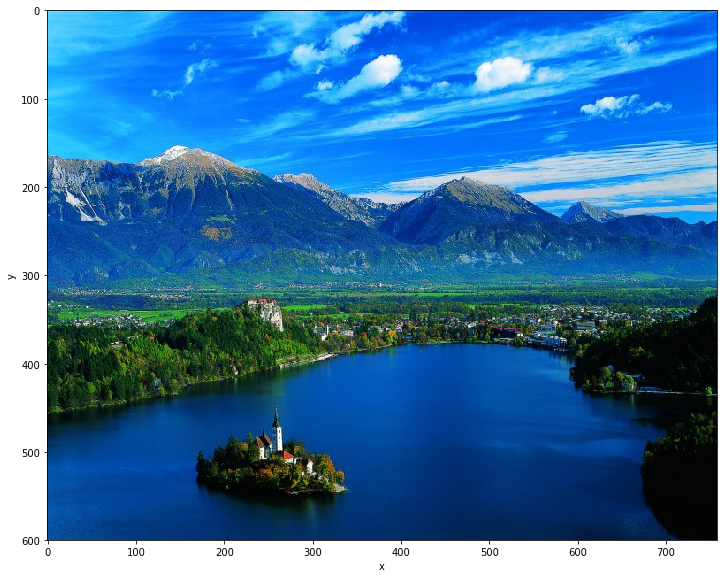

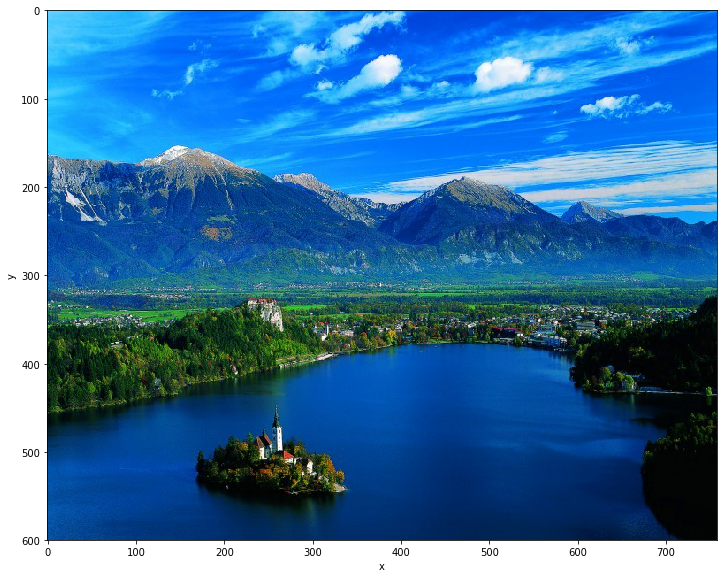

In [11]:
slika_rgb = np.array(Image.open('./data/slika.jpg'))
slika_hsv = convertRGB2HSV(slika_rgb)
# plt.figure(figsize = (12,12))
# rvlib.showImage(slika_hsv)
slika_rgb2 = convertHSV2RGB(slika_hsv)
plt.figure(figsize = (12,12))
rvlib.showImage(slika_rgb)
plt.figure(figsize = (12,12))
rvlib.showImage(slika_rgb2)
#rvlib.showImage(slika_hsv[:,:,0]/360*255)

In [12]:
print(slika_hsv.shape)
print(np.min(slika_hsv[:,:,0]))
print(np.max(slika_hsv[:,:,0]))

(600, 758, 3)
0.0
359.1176473897057


In [25]:
A = np.ones(5)*88
print(A)
A = np.array([1, 10, 50, 55, 111])

[88. 88. 88. 88. 88.]


In [27]:
Amax = np.max(A)
B = scaleImage(A, np.max(A)/np.min(A), 0)
print(B)

[  111  1110  5550  6105 12321]


In [28]:
def lin_scale(iImage, oMax):
    k = oMax/np.max(iImage)
    oImage = k*iImage
    return oImage

In [30]:
B = lin_scale(A,255)
print(B)

[  2.2972973   22.97297297 114.86486486 126.35135135 255.        ]


In [31]:
A = np.array([1,2,3,4,5,6,7,8])
print(np.max(A))

8
